In [1]:
# Load libraries to be used

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Load dataset and replace all fields with ? to NaN values

automobile = pd.read_csv('automobile.txt')

In [2]:
# Get dataset info 

automobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [3]:
# View first 5 records in the dataset to visualize the type of data and incosistencies the dataset might contain
# we notice that there is a special current in some the columns that pandas does not recoginze we need to clean our dataset

automobile.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [16]:
# Statistics of the Dataset

automobile.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
count,203.000000,203.000000,203.000000,203.00000,203.000000,203.000000,203.000000,203.000000,199.000000,199.000000,203.000000,203.000000,201.000000,203.000000,203.000000
mean,0.837438,121.871921,98.781281,174.11330,65.915271,53.731527,2557.916256,127.073892,3.330955,3.254070,10.093202,104.463054,5125.870647,25.172414,30.699507
std,1.250021,31.784599,6.040994,12.33909,2.150274,2.442526,522.557049,41.797123,0.274054,0.318023,3.888216,39.612384,479.820136,6.529812,6.874645
min,-2.000000,65.000000,86.600000,141.10000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000
25%,0.000000,101.000000,94.500000,166.55000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000
50%,1.000000,122.000000,97.000000,173.20000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000
75%,2.000000,137.000000,102.400000,183.30000,66.900000,55.500000,2943.500000,143.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000
max,3.000000,256.000000,120.900000,208.10000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000


# Data Cleaning

Cleaning the dataset

In [26]:
# find out if there are any null values
# get count of NaN values in each column, there is a special character ? that Pandas does not recognize

automobile.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
avg-mpg              0
dtype: int64

In [28]:
aut_summary = round(automobile.describe(),2)
aut_summary

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,avg-mpg
count,203.00,203.00,203.00,203.00,203.00,203.00,203.00,203.00,203.00,203.00,203.00,203.00,203.00,203.00,203.00,203.00,203.00
mean,0.84,121.87,98.78,174.11,65.92,53.73,2557.92,127.07,3.27,3.19,10.09,104.46,5075.37,25.17,30.70,12981.67,27.94
std,1.25,31.78,6.04,12.34,2.15,2.44,522.56,41.80,0.54,0.55,3.89,39.61,696.80,6.53,6.87,8111.58,6.65
min,-2.00,65.00,86.60,141.10,60.30,47.80,1488.00,61.00,0.00,0.00,7.00,48.00,0.00,13.00,16.00,0.00,15.00
25%,0.00,101.00,94.50,166.55,64.10,52.00,2145.00,97.00,3.13,3.10,8.60,70.00,4800.00,19.00,25.00,7649.00,22.25
50%,1.00,122.00,97.00,173.20,65.50,54.10,2414.00,120.00,3.31,3.29,9.00,95.00,5200.00,24.00,30.00,10198.00,27.00
75%,2.00,137.00,102.40,183.30,66.90,55.50,2943.50,143.00,3.58,3.41,9.40,116.00,5500.00,30.00,34.00,16500.00,32.00
max,3.00,256.00,120.90,208.10,72.30,59.80,4066.00,326.00,3.94,4.17,23.00,288.00,6600.00,49.00,54.00,45400.00,51.50


In [29]:
# replacing the special character ? with the average of the normalized-losses column and convert to integer dataType

nl = automobile['normalized-losses'].loc[automobile['normalized-losses'] != '?']
nlmean = nl.astype(str).astype(int).mean()
automobile['normalized-losses'] = automobile['normalized-losses'].replace('?',nlmean).astype(int)

In [ ]:
# replacing the special character ? with the average price and convert the datatype to integer

price = automobile['price'].loc[automobile['price'] != '?']
price_mean = price.astype(str).astype(int).mean()
automobile['price'] = automobile['price'].replace('?',price_mean).astype(int)

In [8]:
# Checking if horse power is numeric and non numberic fields with average horsepower and convert the datatype to integer

horsepower = automobile['horsepower'].loc[automobile['horsepower'] != '?']
horsepower_mean = horsepower.astype(str).astype(int).mean()
automobile['horsepower'] = automobile['horsepower'].replace('?',horsepower_mean).astype(int)
automobile.loc[automobile['horsepower'] > 10000]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


In [9]:
# view changes to the first 20 records on the dataset, to ensure the dataset was cleaned properly

automobile.head(20)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,122,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,122,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [ ]:
# Replace the non-numeric value to null and conver the datatype

automobile['bore'] = pd.to_numeric(automobile['bore'],errors='coerce')

# Replace the non-numeric value to null and convert the datatype

automobile['stroke'] = pd.to_numeric(automobile['stroke'],errors='coerce')

# Convert the non-numeric data to null and convert the datatype

automobile['peak-rpm'] = pd.to_numeric(automobile['peak-rpm'],errors='coerce')


In [15]:
# Remove records which are having ? in the number of doors column if there are any

print(automobile['num-of-doors'].loc[automobile['num-of-doors'] == '?'])
automobile = automobile[automobile['num-of-doors'] != '?']
automobile['num-of-doors'].loc[automobile['num-of-doors'] == '?']

Series([], Name: num-of-doors, dtype: object)


Series([], Name: num-of-doors, dtype: object)

In [18]:
vehicle_count=automobile.make.value_counts()
vehicle_count

toyota           32
nissan           18
mazda            16
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
mercedes-benz     8
dodge             8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64

In [19]:
#Overall statistics of vehicles
overall_stats = automobile.groupby('make').mean()
overall_stats

C:\Users\user\AppData\Local\Temp\ipykernel_6492\1882440406.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  overall_stats = automobile.groupby('make').mean()


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
make,,,,,,,,,,,,,,,
alfa-romero,2.333333,122.000000,90.566667,169.600000,64.566667,50.000000,2639.666667,137.333333,3.206667,2.943333,9.000000,125.333333,5000.000000,20.333333,26.666667
audi,1.285714,144.285714,102.271429,183.828571,68.714286,54.428571,2800.714286,130.714286,3.172857,3.400000,8.400000,121.000000,5500.000000,18.857143,24.142857
bmw,0.375000,156.000000,103.162500,184.500000,66.475000,54.825000,2929.375000,166.875000,3.473750,3.167500,8.575000,138.875000,5068.750000,19.375000,25.375000
chevrolet,1.000000,100.000000,92.466667,151.933333,62.500000,52.400000,1757.000000,80.333333,2.990000,3.083333,9.566667,62.666667,5300.000000,41.000000,46.333333
dodge,1.000000,131.625000,95.175000,161.450000,64.212500,51.775000,2146.375000,103.250000,3.102500,3.362500,8.763750,84.375000,5375.000000,28.500000,34.625000
honda,0.615385,103.000000,94.330769,160.769231,64.384615,53.238462,2096.769231,99.307692,3.021538,3.462308,9.215385,80.230769,5753.846154,30.384615,35.461538
isuzu,0.750000,122.000000,94.825000,163.775000,63.550000,52.225000,2213.500000,102.500000,3.200000,3.170000,9.225000,77.000000,5150.000000,31.000000,36.000000
jaguar,0.000000,129.666667,109.333333,196.966667,69.933333,51.133333,4027.333333,280.666667,3.600000,3.700000,9.233333,204.666667,4833.333333,14.333333,18.333333
mazda,1.187500,123.812500,96.906250,170.368750,65.531250,53.225000,2288.750000,101.812500,3.278333,3.291667,9.725000,86.875000,5137.500000,25.062500,31.312500


In [20]:
round(automobile.corr(),2)

C:\Users\user\AppData\Local\Temp\ipykernel_6492\2880679947.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  round(automobile.corr(),2)


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
symboling,1.00,0.47,-0.53,-0.36,-0.23,-0.54,-0.23,-0.11,-0.13,-0.01,-0.17,0.07,0.27,-0.03,0.04
normalized-losses,0.47,1.00,-0.05,0.02,0.09,-0.37,0.10,0.11,-0.03,0.05,-0.12,0.20,0.24,-0.22,-0.18
wheel-base,-0.53,-0.05,1.00,0.87,0.79,0.59,0.78,0.57,0.49,0.16,0.25,0.35,-0.36,-0.48,-0.55
length,-0.36,0.02,0.87,1.00,0.84,0.49,0.88,0.68,0.60,0.13,0.15,0.56,-0.28,-0.68,-0.72
width,-0.23,0.09,0.79,0.84,1.00,0.27,0.87,0.74,0.56,0.19,0.18,0.65,-0.22,-0.65,-0.69
height,-0.54,-0.37,0.59,0.49,0.27,1.00,0.29,0.06,0.17,-0.06,0.25,-0.11,-0.32,-0.06,-0.12
curb-weight,-0.23,0.10,0.78,0.88,0.87,0.29,1.00,0.85,0.65,0.17,0.16,0.75,-0.27,-0.76,-0.80
engine-size,-0.11,0.11,0.57,0.68,0.74,0.06,0.85,1.00,0.59,0.21,0.03,0.81,-0.24,-0.66,-0.68
bore,-0.13,-0.03,0.49,0.60,0.56,0.17,0.65,0.59,1.00,-0.05,-0.00,0.58,-0.26,-0.60,-0.60
stroke,-0.01,0.05,0.16,0.13,0.19,-0.06,0.17,0.21,-0.05,1.00,0.19,0.09,-0.07,-0.05,-0.05


In [25]:
#filling NA values with 0
automobile = automobile.fillna(0) 

#replacing symbols with 0 value
automobile = automobile.replace(to_replace='?',value=0) 

automobile['avg-mpg']=automobile[['city-mpg','highway-mpg']].mean(axis=1)


#converting object data type into floats and integers
automobile['normalized-losses'] = automobile['normalized-losses'].astype(int)
automobile['bore'] = automobile['bore'].astype(float)
automobile['stroke'] = automobile['stroke'].astype(float)
automobile['horsepower'] = automobile['horsepower'].astype(int)
automobile['peak-rpm'] = automobile['peak-rpm'].astype(int)
automobile['price'] = automobile['price'].astype(int)
automobile.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,avg-mpg
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,24.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,24.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,22.5
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,27.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,20.0


# Data Stories and Data Visualization

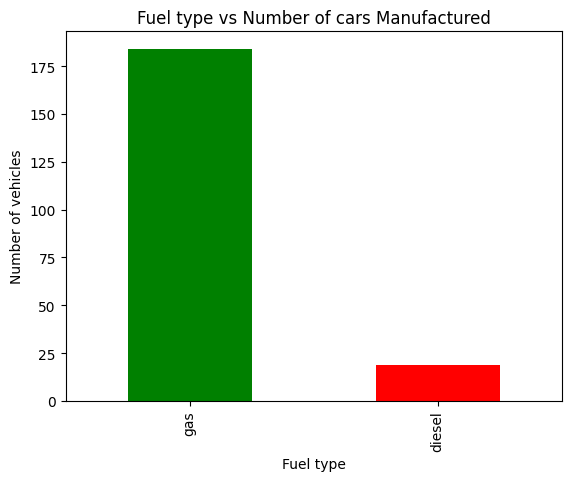

In [30]:
# Bar graph to show number of automobiles manufactured that use gas and diesel 

automobile['fuel-type'].value_counts().plot(kind='bar',color=['green', 'red'])
plt.title("Fuel type vs Number of cars Manufactured")
plt.ylabel('Number of vehicles')
plt.xlabel('Fuel type');

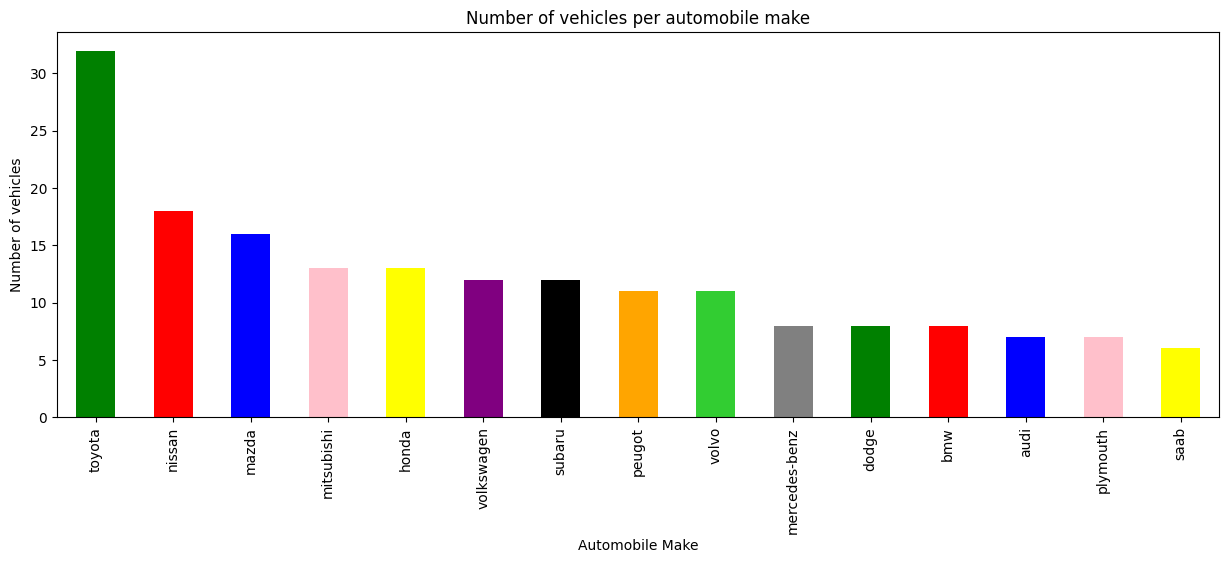

In [35]:
# Bar graph to show top 15 number of automobiles manufactured per make

automobile.make.value_counts().nlargest(15).plot(kind='bar', figsize=(15,5),color=['green', 'red','blue','pink','yellow','purple','black','orange','limegreen','grey'])
plt.title("Number of vehicles per automobile make")
plt.ylabel('Number of vehicles')
plt.xlabel('Automobile Make');

Text(0.5, 1.0, 'Turbo charged vs  Standard automobiles manufactured (%)')

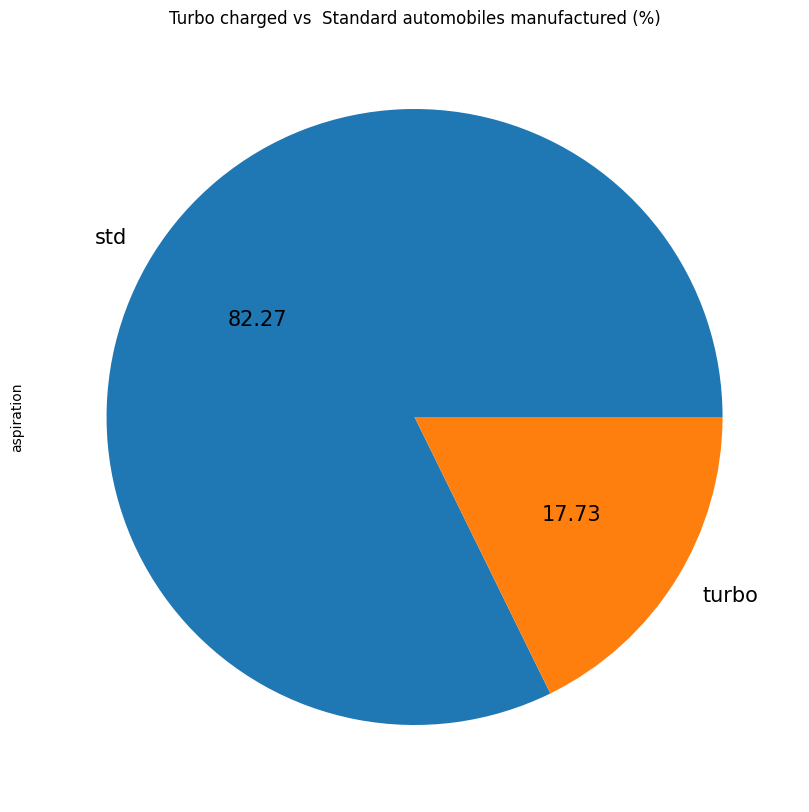

In [34]:
# Piechart to show std automobiles and those that have a turbo

automobile['aspiration'].value_counts().plot.pie(figsize=(10, 10), autopct='%.2f',fontsize=15)
plt.title("Turbo charged vs  Standard automobiles manufactured (%)")

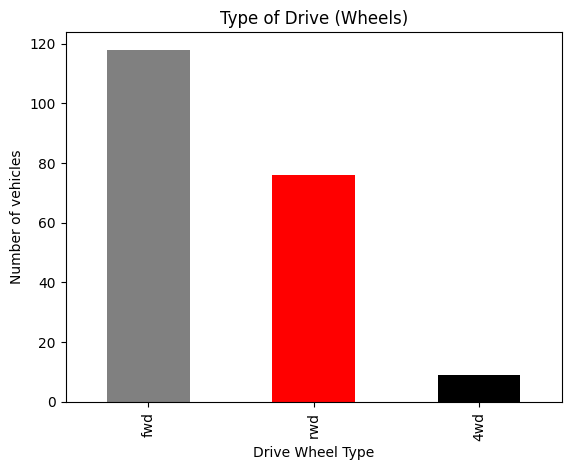

In [36]:
# Visualize number of automobiles vs type of wheels drive

automobile['drive-wheels'].value_counts().plot(kind='bar',color=['grey','red','black'])
plt.title("Type of Drive (Wheels)")
plt.ylabel('Number of vehicles')
plt.xlabel('Drive Wheel Type');

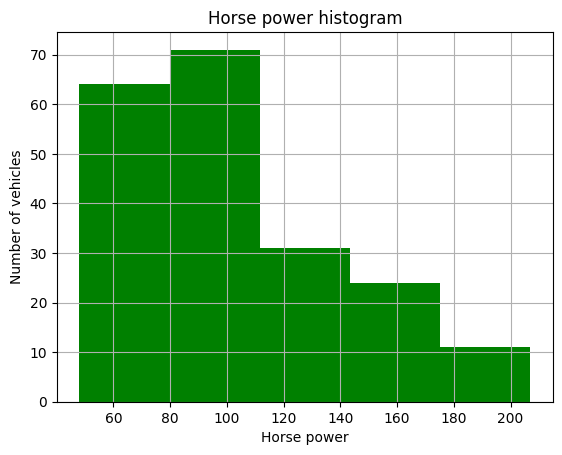

In [37]:
# Histograph showing number of automobiles produced according to horse power

automobile.horsepower[np.abs(automobile.horsepower-automobile.horsepower.mean())<=(3*automobile.horsepower.std())].hist(bins=5,color='green');
plt.title("Horse power histogram")
plt.ylabel('Number of vehicles')
plt.xlabel('Horse power');

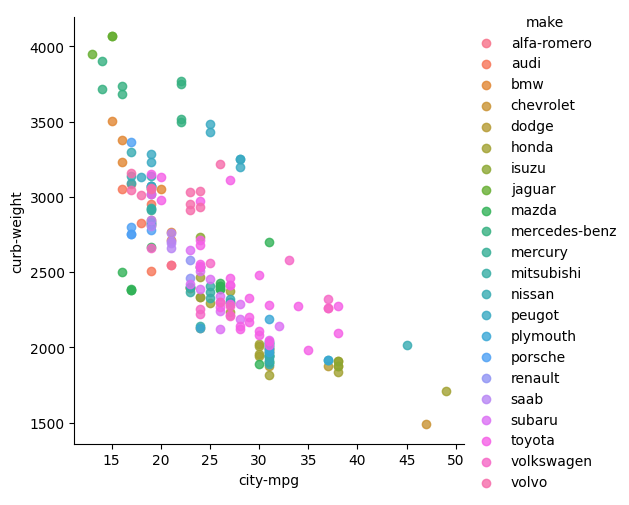

In [42]:
# the visualization shows that the more heavier the car weight the less it travels in the city
# which is idea because most people prefer smaller cars to travel in the city "for day to day travel"

plot_city = sns.lmplot(x="city-mpg", y="curb-weight", data=automobile, hue='make', fit_reg=False);


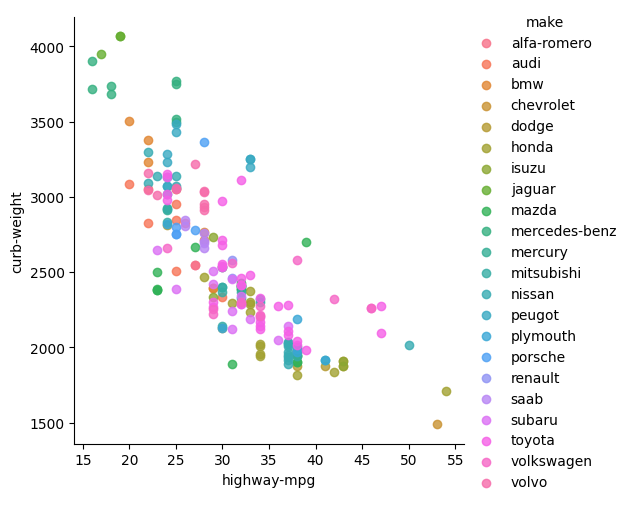

In [43]:
# the visualization shows that the more heaveir the car weight the less it travels on the highway
# small weight cars travel more on the freeway as depicted by the mileage

plot_city = sns.lmplot(x="highway-mpg", y="curb-weight", data=automobile, hue='make', fit_reg=False);

# Price Analysis

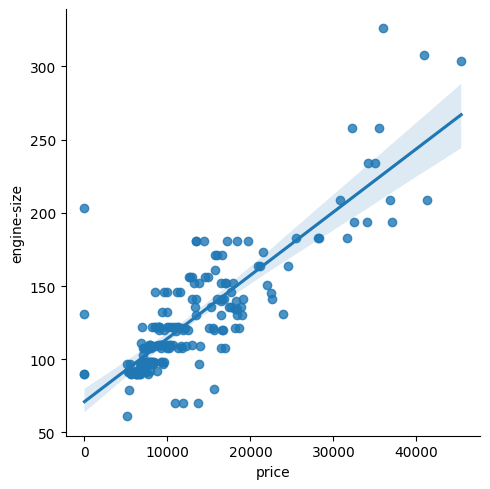

In [48]:
# scatter plot
# The bigger the Engine the higher price of the vehicle

scatter_plot= sns.lmplot(x="price", y= "engine-size", data = automobile)

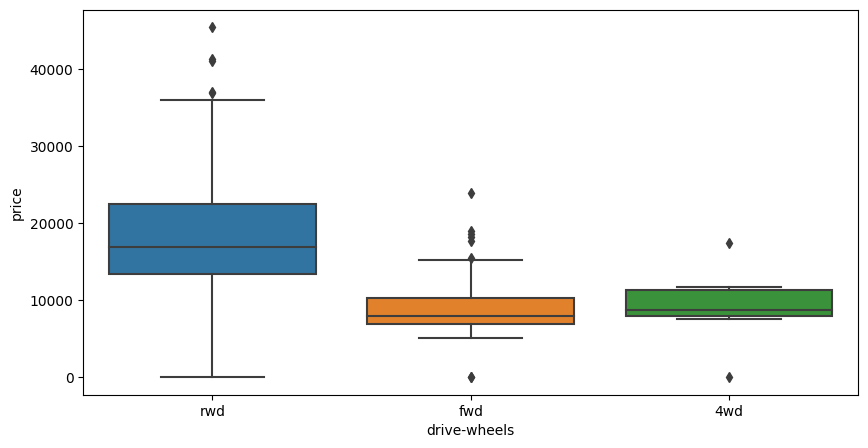

In [49]:
# Data Correlation in our DataSet

# Data visualization below shows that rwd is more expensive, fwd least expensive with 4wd data being little to tell if is expensive or least expensive

plt.rcParams['figure.figsize']=(10,5)
ax = sns.boxplot(x="drive-wheels", y="price", data=automobile)

What are the features of a car that correlate with the price?

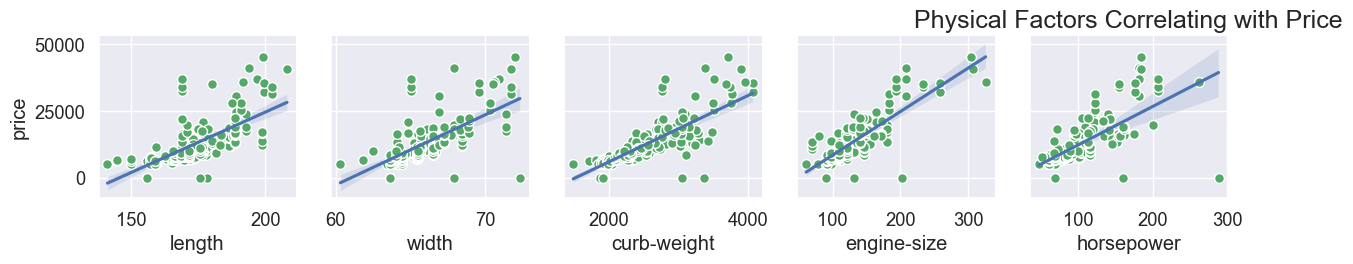

In [126]:
#what are the features of a car that correlate with the price?

a = sns.PairGrid(automobile, x_vars=["length", "width", "curb-weight","engine-size","horsepower"], y_vars=["price"])
a = a.map(sns.regplot)
a = a.map(plt.scatter, linewidths=1, edgecolor="w", s=50, color='g')
a = sns.set(font_scale=1.5)
plt.title('Physical Factors Correlating with Price')
plt.show()


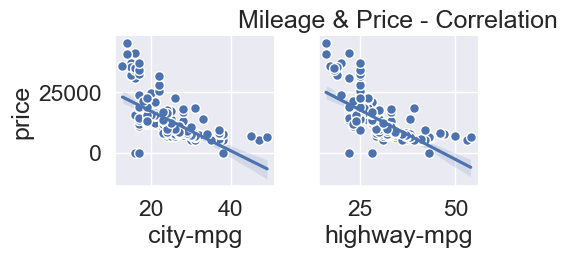

In [127]:
b = sns.PairGrid(automobile, x_vars=["city-mpg", "highway-mpg"], y_vars=["price"])
b = b.map(sns.regplot)
b = b.map(plt.scatter, linewidths=1, edgecolor="w", s=50)
b = sns.set(font_scale=1.5)
plt.title('Mileage & Price - Correlation')
plt.show()

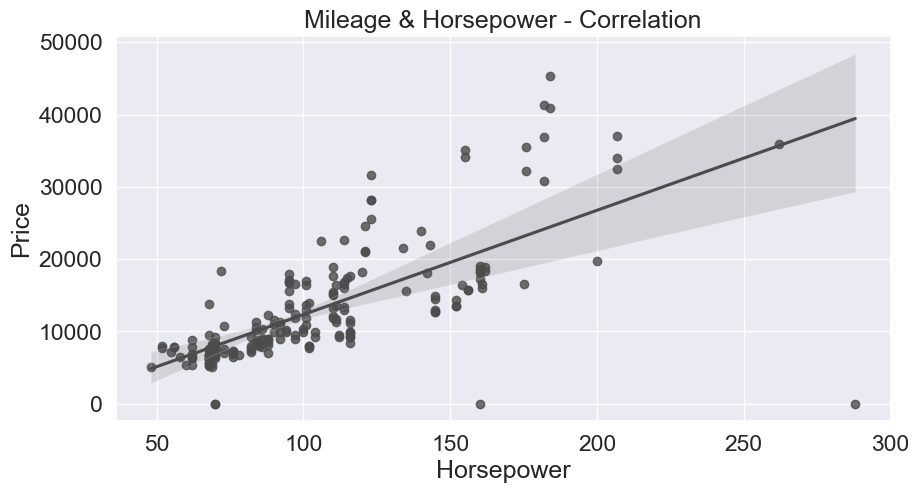

In [136]:

c = sns.regplot(x='horsepower', y='price', data=automobile, color='.3')
c = plt.title('Mileage & Horsepower - Correlation')
c = plt.xlabel('Horsepower')
c = plt.ylabel('Price')
c = sns.set(font_scale=1.3)
plt.show()

In [102]:
# Price range of cars - Cheapest to costliest

price_table = pd.pivot_table(automobile, values='price', index='make', aggfunc=np.mean)
price_table = price_table.sort_values(by='price', ascending=True)
round(price_table,2)

,price
make,
isuzu,4458.25
chevrolet,6007.00
dodge,7790.12
plymouth,7963.43
honda,8184.69
subaru,8541.25
mitsubishi,9239.77
renault,9595.00
toyota,9885.81


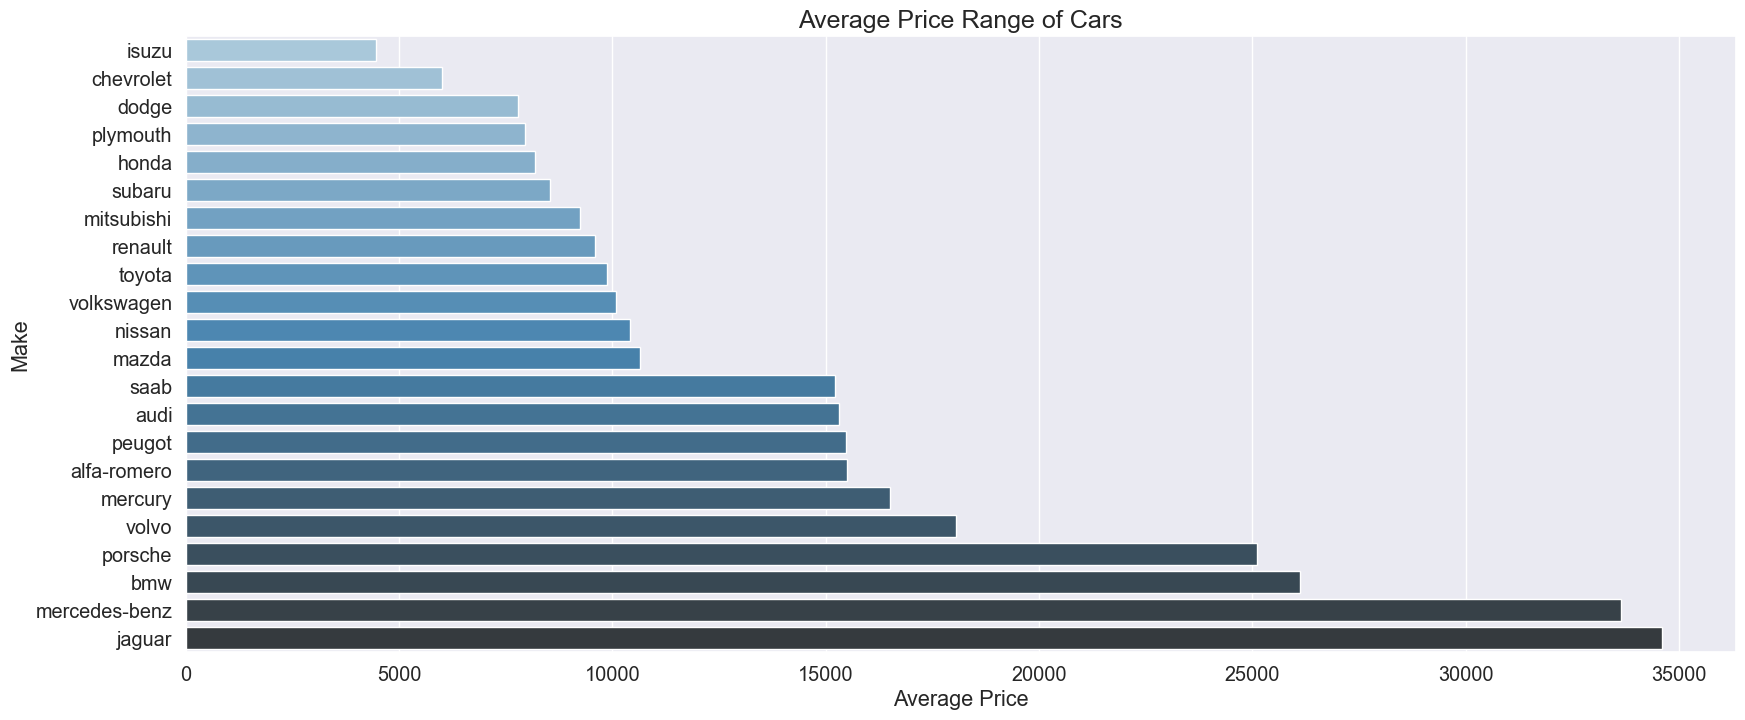

In [104]:
# Average Prices Range of Cars
price_table = pd.pivot_table(automobile, values='price', index='make', aggfunc=np.mean)
price_table = price_table.sort_values(by='price', ascending=True)
price_table = price_table.reset_index()
round(price_table,2)

plt.figure(figsize=(20,8))
sns.barplot(data=price_table, y='make', x='price', palette = 'Blues_d')
price_table = sns.set(font_scale = 1.5)
plt.title('Average Price Range of Cars')
plt.xlabel('Average Price')
plt.ylabel('Make')
plt.show()

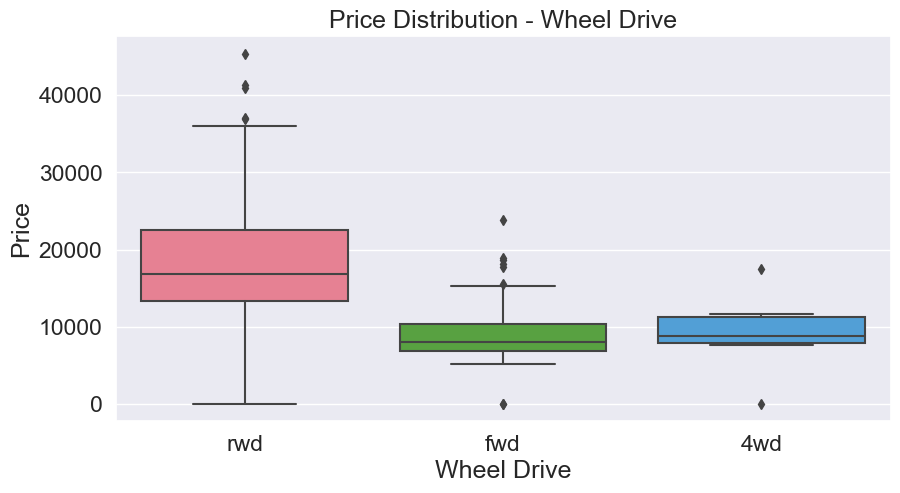

In [106]:
#Price range of RWD, FWD and 4WD

d = sns.boxplot(x="drive-wheels", y="price", data=automobile, palette='husl')
d = sns.set(font_scale=1.5)
plt.title('Price Distribution - Wheel Drive')
plt.xlabel('Wheel Drive')
plt.ylabel('Price')
plt.show()


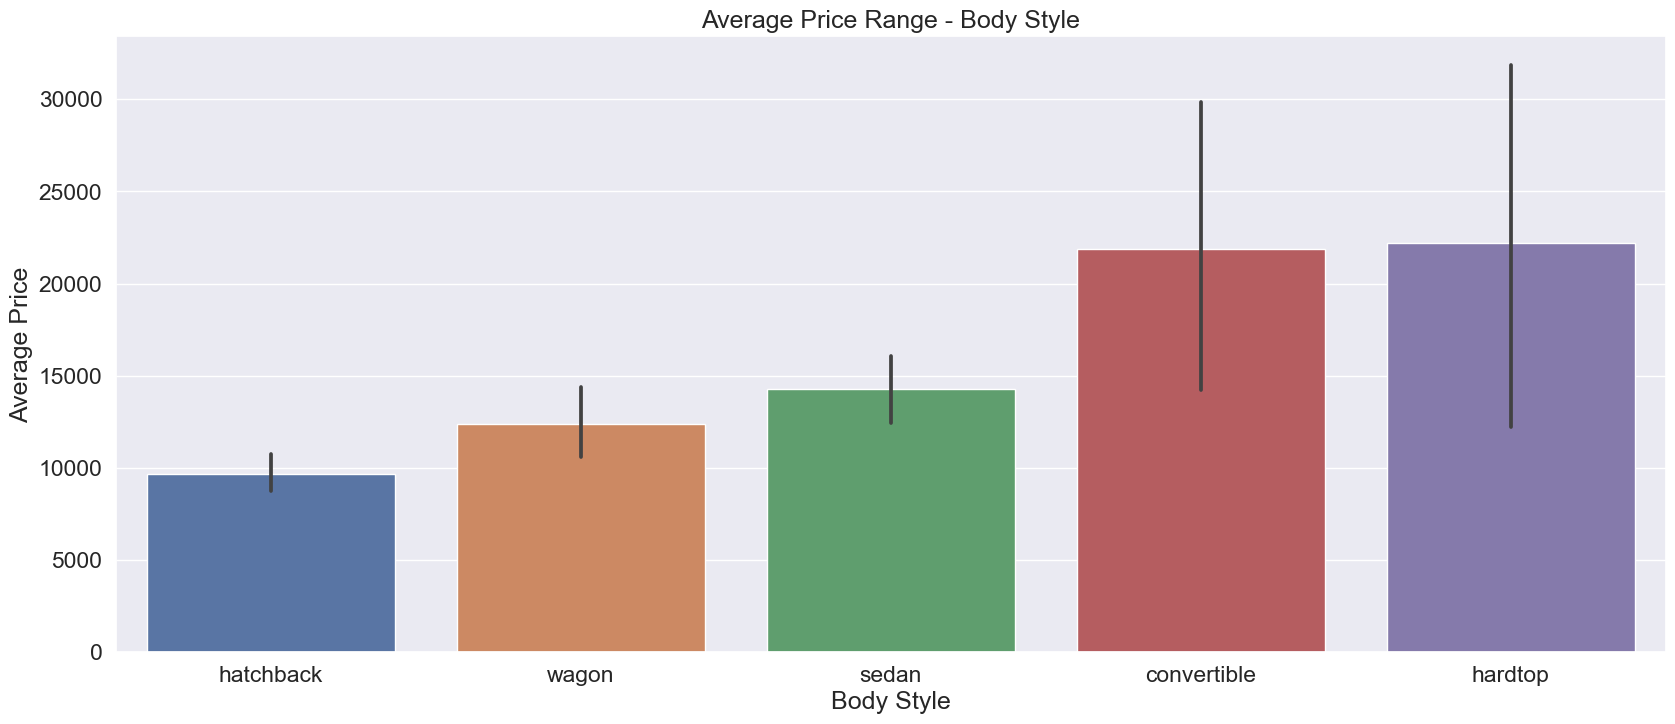

In [108]:
#Which body style is the most expensive?
plt.figure(figsize=(20,8))
sns.set(font_scale=1.5)

sns.barplot(data=automobile, x='body-style', y='price', order=['hatchback','wagon','sedan','convertible','hardtop'] )
plt.xlabel('Body Style')
plt.ylabel('Average Price')
plt.title('Average Price Range - Body Style')

plt.show()


Best performing low cost car

In [110]:
price_table1 = pd.pivot_table(automobile, values='price', index='make', aggfunc=np.max)
price_table1 = price_table1.sort_values(by='price', ascending=True)
round(price_table1,2)

economic_cars = price_table1.head(12)
economic_cars

,price
make,
chevrolet,6575
renault,9895
isuzu,11048
subaru,11694
plymouth,12764
honda,12945
dodge,12964
volkswagen,13845
mitsubishi,14869


Analysing the performance of economical vehicles

In [111]:
#analysing the performance of economical vehicles
economy_stats = automobile.groupby('make').max()
economy_stats = economy_stats.sort_values(by='price', ascending = True)
economy_stats = economy_stats.head(12)
#economy_stats = DataFrame(economy_stats)
economy_stats = economy_stats.reset_index()


economy_stats

,make,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,avg-mpg
0,chevrolet,2,121,gas,std,two,sedan,fwd,front,94.5,...,2bbl,3.03,3.11,9.60,70,5400,47,53,6575,50.0
1,renault,2,122,gas,std,two,wagon,fwd,front,96.1,...,mpfi,3.46,3.90,8.70,104,0,23,31,9895,27.0
2,isuzu,2,122,gas,std,two,sedan,rwd,front,96.0,...,spfi,3.43,3.23,9.60,90,5400,38,43,11048,40.5
3,subaru,2,102,gas,turbo,two,wagon,fwd,front,97.2,...,mpfi,3.62,2.64,9.50,111,5200,32,37,11694,34.5
4,plymouth,3,154,gas,turbo,two,wagon,rwd,front,103.3,...,spdi,3.59,3.86,9.40,145,5500,37,41,12764,39.0
5,honda,2,137,gas,std,two,wagon,fwd,front,96.5,...,mpfi,3.15,3.58,10.10,101,6000,49,54,12945,51.5
6,dodge,3,148,gas,turbo,two,wagon,fwd,front,103.3,...,mpfi,3.60,3.90,9.41,145,5500,37,41,12964,39.0
7,volkswagen,3,256,gas,turbo,two,wagon,fwd,front,100.4,...,mpfi,3.19,3.40,23.00,110,5500,37,46,13845,41.5
8,mitsubishi,3,161,gas,turbo,two,sedan,fwd,front,96.3,...,spdi,3.59,3.86,9.40,145,5500,37,41,14869,39.0
9,alfa-romero,3,122,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,3.47,3.47,9.00,154,5000,21,27,16500,24.0


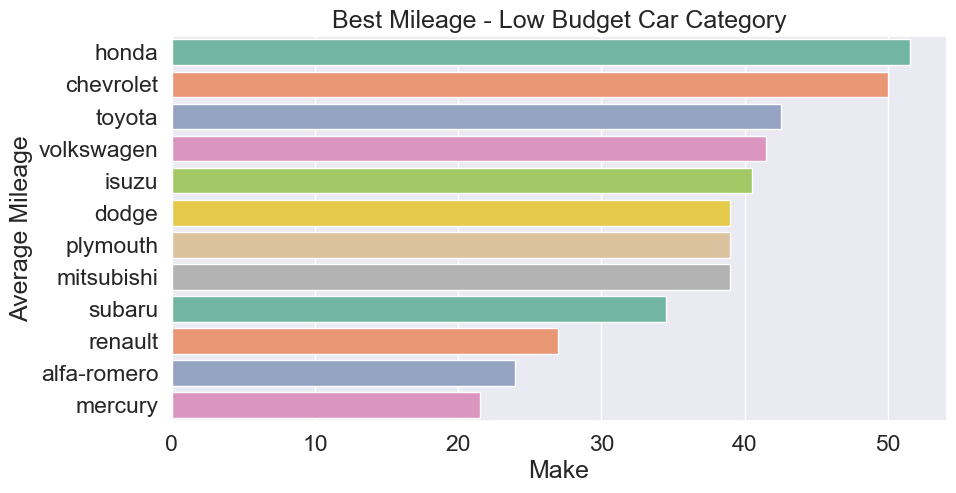

In [112]:
# Best Mileage - Low Budget Car Category
sns.barplot(data=economy_stats, y='make', x='avg-mpg', order = ['honda', 'chevrolet','toyota','volkswagen',
                                                                'isuzu', 'dodge','plymouth','mitsubishi','subaru','renault','alfa-romero','mercury'], palette = 'Set2')

plt.xlabel('Make')
plt.ylabel('Average Mileage')
plt.title('Best Mileage - Low Budget Car Category')
sns.set(font_scale=1.2)
plt.show()

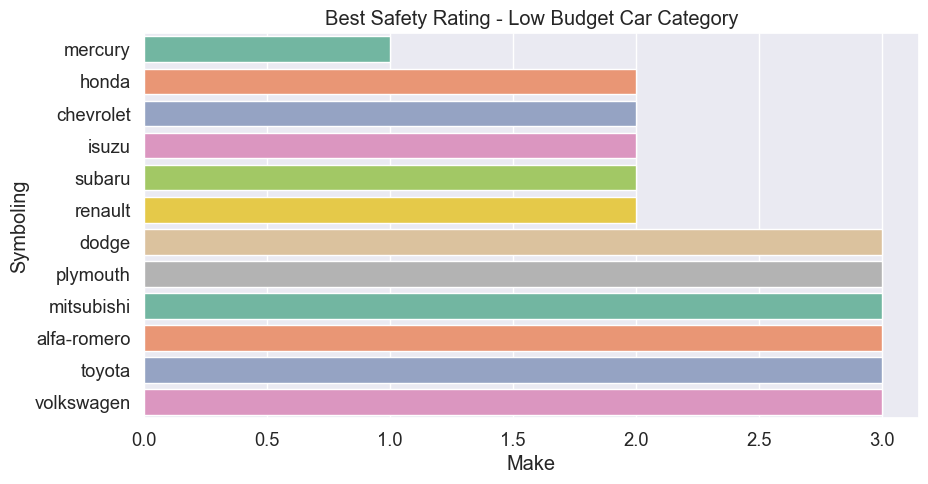

In [113]:
# Best Safety Rating - Low Budget Car Category
sns.barplot(data=economy_stats, y='make', x='symboling', order = ['mercury','honda', 'chevrolet','isuzu','subaru','renault',
                                                                 'dodge','plymouth','mitsubishi','alfa-romero','toyota','volkswagen'], palette = 'Set2')
plt.xlabel('Make')
plt.ylabel('Symboling')
plt.title('Best Safety Rating - Low Budget Car Category')
sns.set(font_scale=1.2)
plt.show()

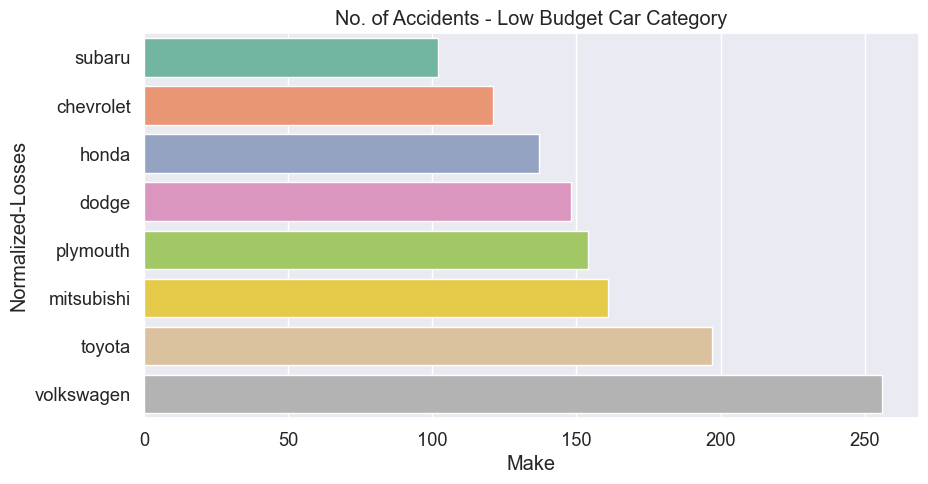

In [114]:
# Number of Accidents - Low Budget Car Category
sns.barplot(data=economy_stats, y='make', x='normalized-losses', order = ['subaru','chevrolet','honda','dodge','plymouth','mitsubishi','toyota',
                                                                  'volkswagen'], palette = 'Set2')
plt.xlabel('Make')
plt.ylabel('Normalized-Losses')
plt.title('No. of Accidents - Low Budget Car Category')
sns.set(font_scale=1.2)
plt.show()

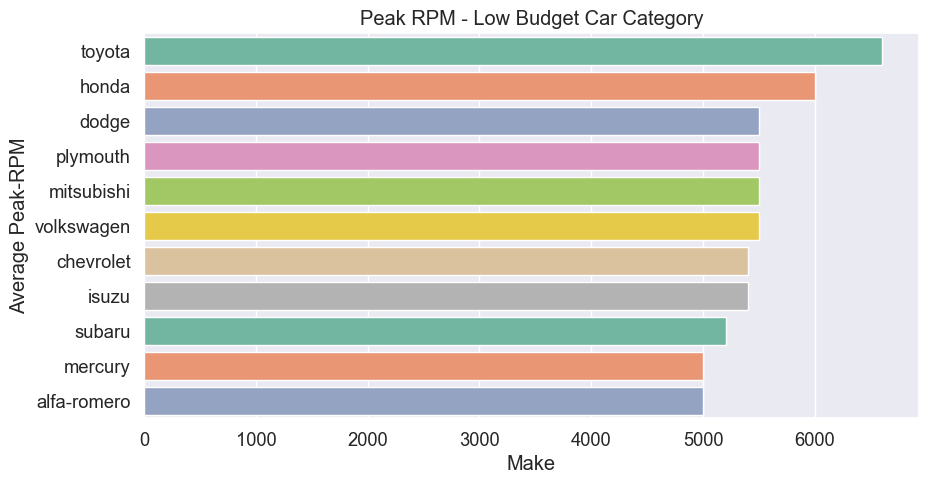

In [115]:
# Peak RPM - Low Budget Car Category
sns.barplot(data=economy_stats, y='make', x='peak-rpm', order = ['toyota','honda','dodge','plymouth','mitsubishi','volkswagen','chevrolet','isuzu','subaru','mercury', 
                                                                 'alfa-romero'], palette = 'Set2')
plt.xlabel('Make')
plt.ylabel('Average Peak-RPM')
plt.title('Peak RPM - Low Budget Car Category')
sns.set(font_scale=1.2)
plt.show()

Mileage Analysis

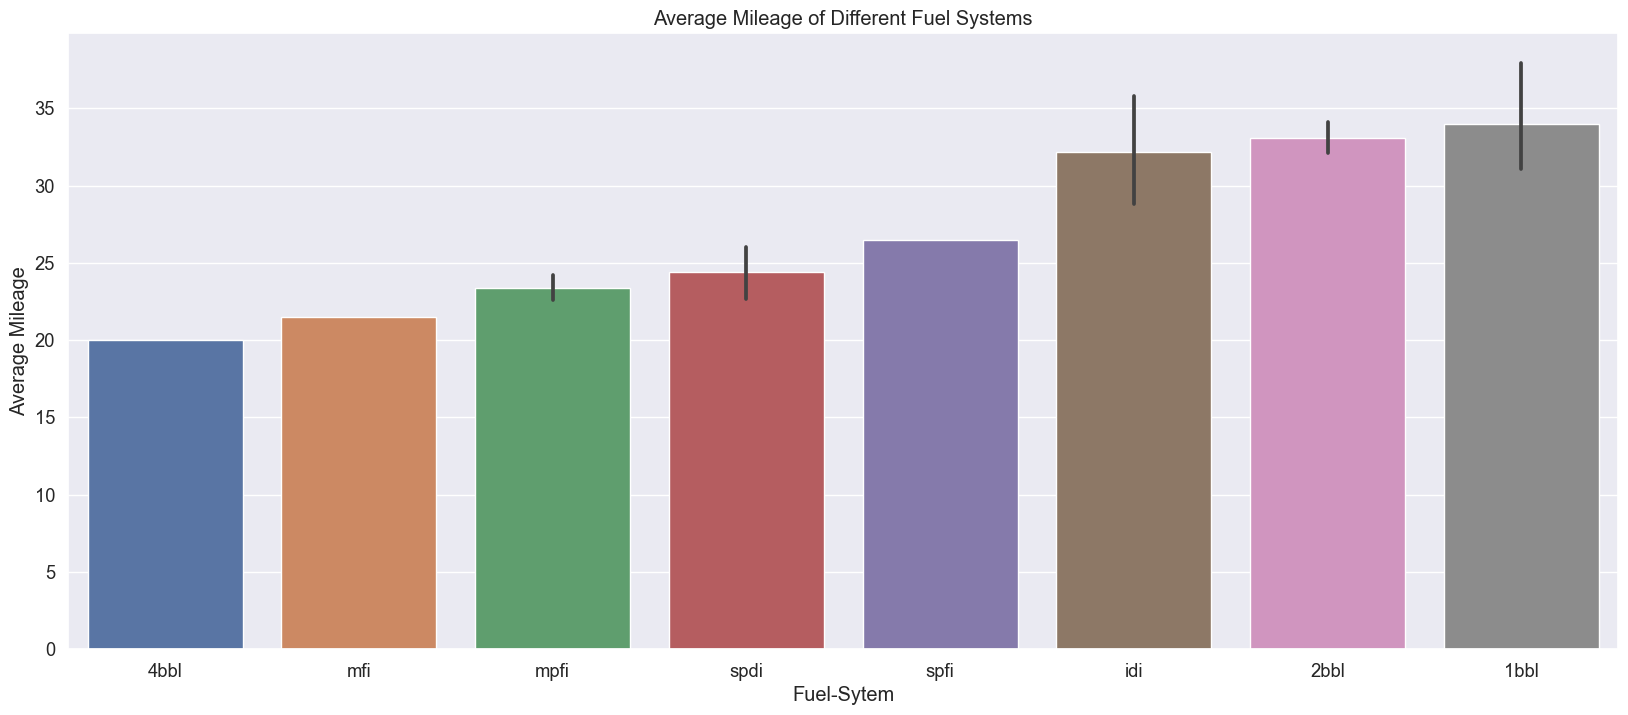

In [116]:
# Average Mileage of Different Fuel Systems
plt.figure(figsize=(20,8))

sns.barplot(data=automobile, x='fuel-system', y='avg-mpg',  order = ['4bbl','mfi','mpfi','spdi','spfi','idi','2bbl','1bbl'])
plt.xlabel('Fuel-Sytem')
plt.ylabel('Average Mileage')
plt.title('Average Mileage of Different Fuel Systems')
sns.set(font_scale= 1.3)


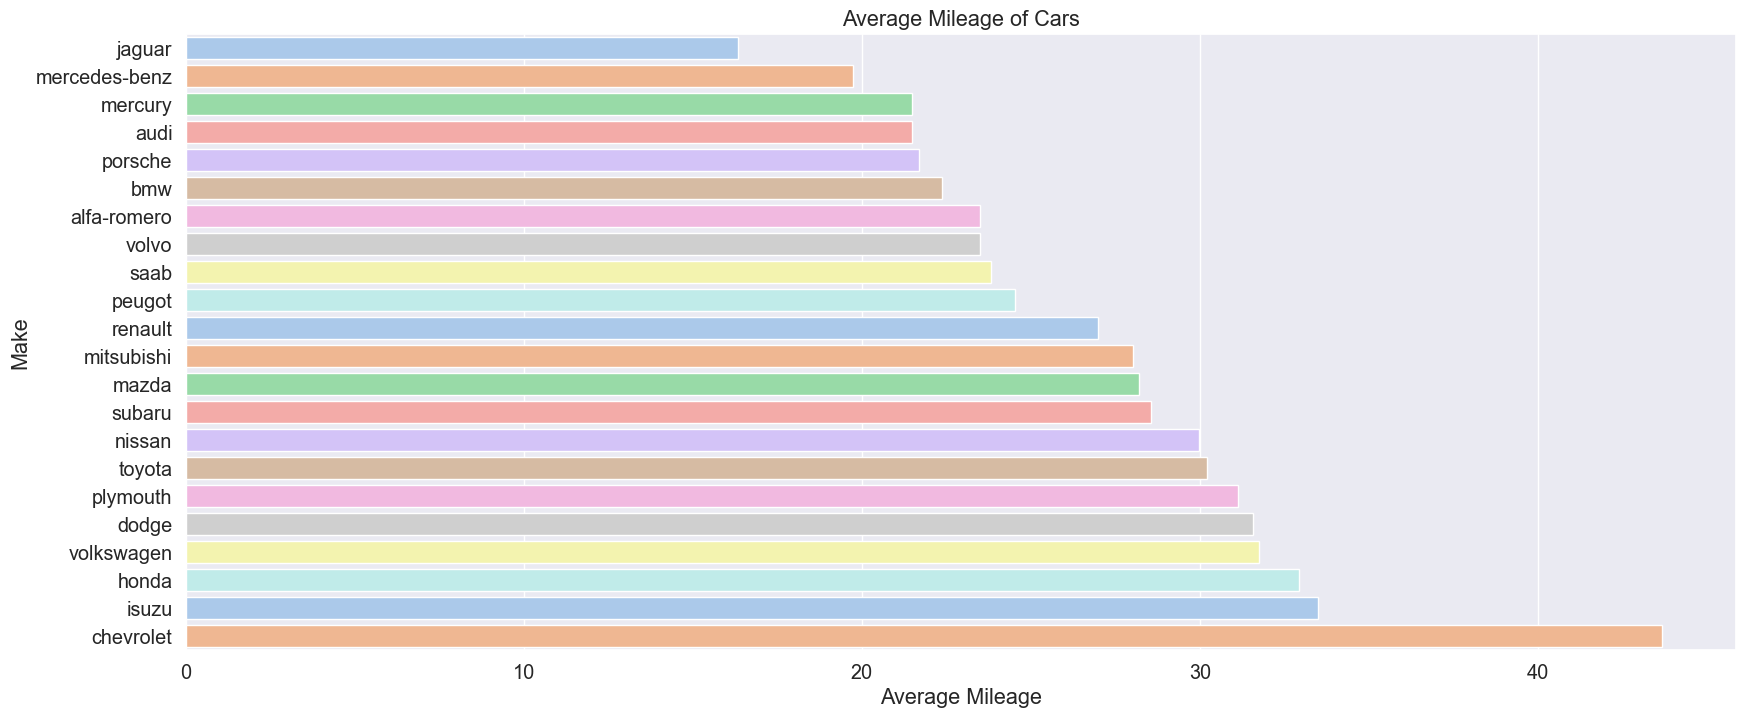

In [117]:
# Average milage of cars
mpg_table = pd.pivot_table(automobile, values='avg-mpg', index='make', aggfunc=np.mean)
mpg_table = mpg_table.sort_values(by='avg-mpg', ascending=True)
mpg_table = mpg_table.reset_index()
round(mpg_table,2)

plt.figure(figsize=(20,8))
sns.barplot(data=mpg_table, y='make', x='avg-mpg', palette='pastel')
plt.xlabel('Average Mileage')
plt.ylabel('Make')
plt.title('Average Mileage of Cars')
sns.set(font_scale=1.7)
plt.show()

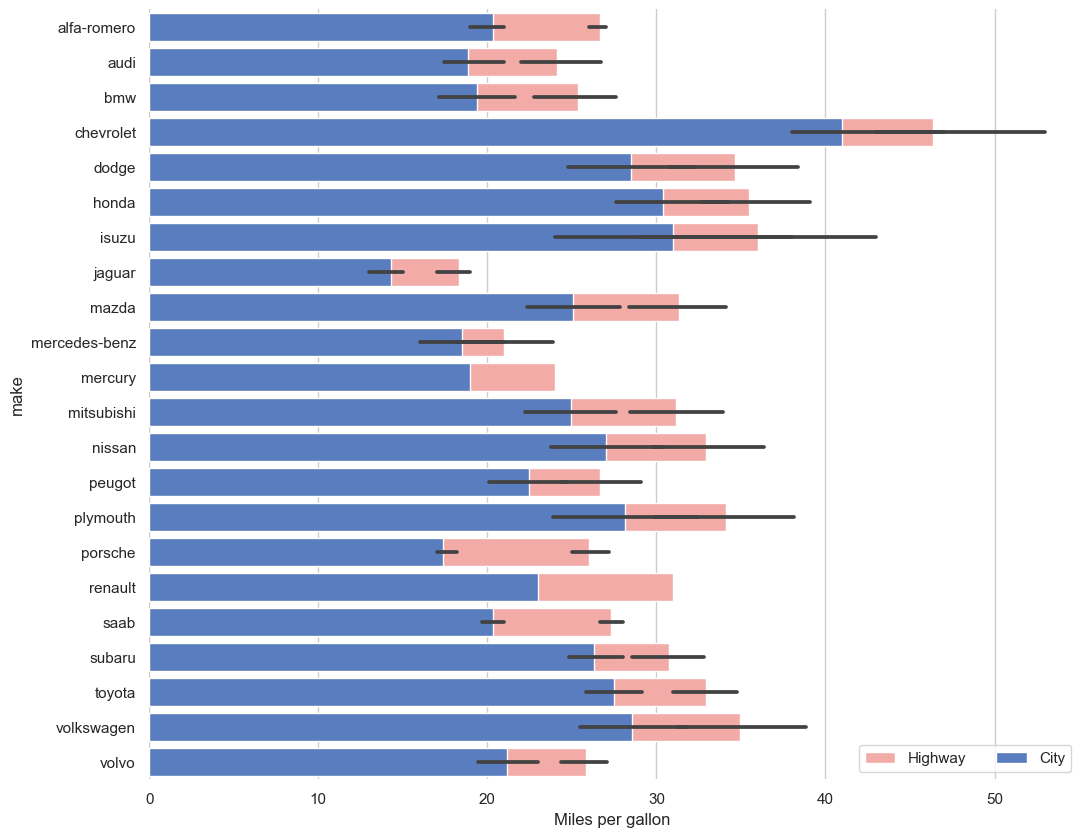

In [119]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Plot the highway-mpg
sns.set_color_codes("pastel")
sns.barplot(x="highway-mpg", y="make", data=automobile,
            label="Highway", color="r")
automobile.sort_values(by='highway-mpg', ascending =True)
# Plot the city-mpg
sns.set_color_codes("muted")
sns.barplot(x="city-mpg", y="make", data=automobile,
            label="City", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 55), ylabel="make",
       xlabel="Miles per gallon ")
sns.despine(left=True, bottom=True)

plt.show()

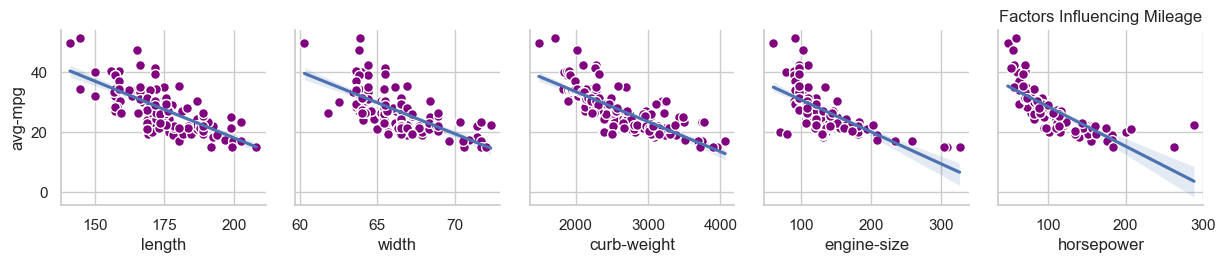

In [121]:
#Average Mileage of Cars
#Factors Influencing Mileage
h = sns.PairGrid(automobile, x_vars=["length", "width", "curb-weight","engine-size", "horsepower"], y_vars=["avg-mpg"])
h = h.map(sns.regplot)
h = h.map(plt.scatter, linewidths=1, edgecolor="w", s=50, color='purple')
plt.title('Average Mileage of Cars')

plt.title('Factors Influencing Mileage')
sns.set(font_scale=1.3)
plt.show()


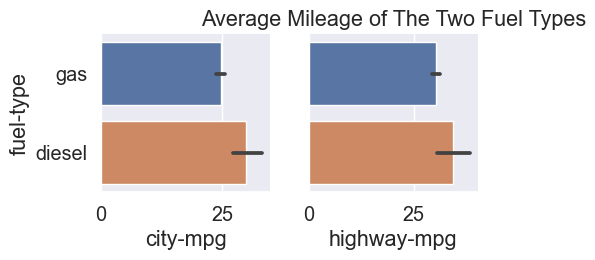

In [124]:
# Average Mileage of The Two Fuel Types
h = sns.PairGrid(automobile, x_vars=["city-mpg","highway-mpg"], y_vars=["fuel-type"])
h = h.map(sns.barplot, palette='pastel')
plt.title('Average Mileage of The Two Fuel Types')
sns.set(font_scale=2)

plt.show()

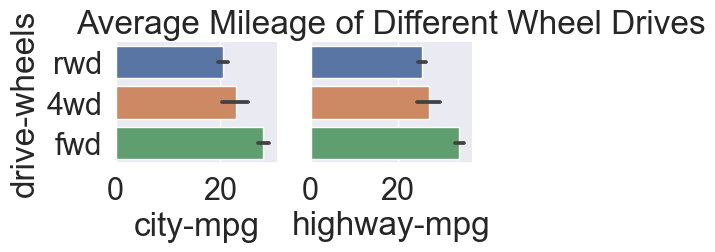

In [125]:
# Average Mileage of Different Wheel Drives
i = sns.PairGrid(automobile, x_vars=["city-mpg","highway-mpg"], y_vars=["drive-wheels"])
i = i.map(sns.barplot, palette='muted', order = ['rwd','4wd','fwd'])
plt.title('Average Mileage of Different Wheel Drives')
sns.set(font_scale=1.2)
plt.show()


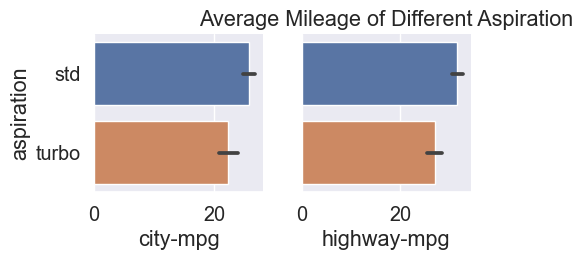

In [129]:
# Average Mileage of Different Aspiration
k = sns.PairGrid(automobile, x_vars=["city-mpg","highway-mpg"], y_vars=["aspiration"])
k = k.map(sns.barplot, palette='RdBu_r')
plt.title('Average Mileage of Different Aspiration')
sns.set(font_scale=1.7)
plt.show()

Performance Analysis

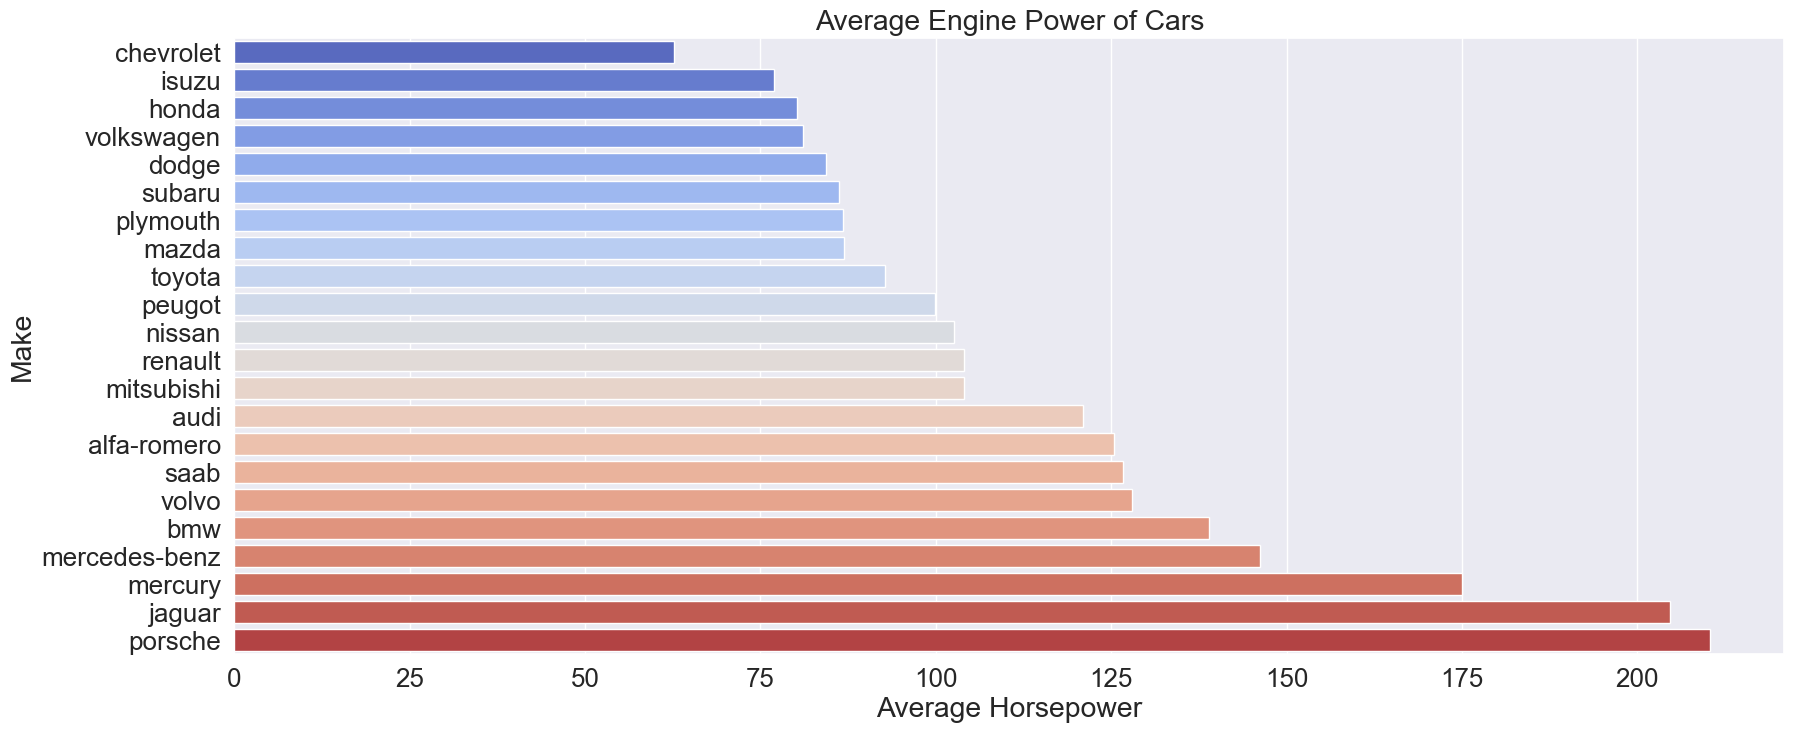

In [130]:
# Average Engine Power of Cars
prfm_table = pd.pivot_table(automobile, values='horsepower', index='make', aggfunc=np.mean)
prfm_table = prfm_table.sort_values(by='horsepower', ascending=True)
prfm_table = prfm_table.reset_index()
round(mpg_table,2)

plt.figure(figsize=(20,8))
plt.title('Average Engine Power of Cars')
sns.set(font_scale=1.5)
sns.barplot(data=prfm_table, y='make', x='horsepower', palette='coolwarm')
plt.xlabel('Average Horsepower')
plt.ylabel('Make')

plt.show()

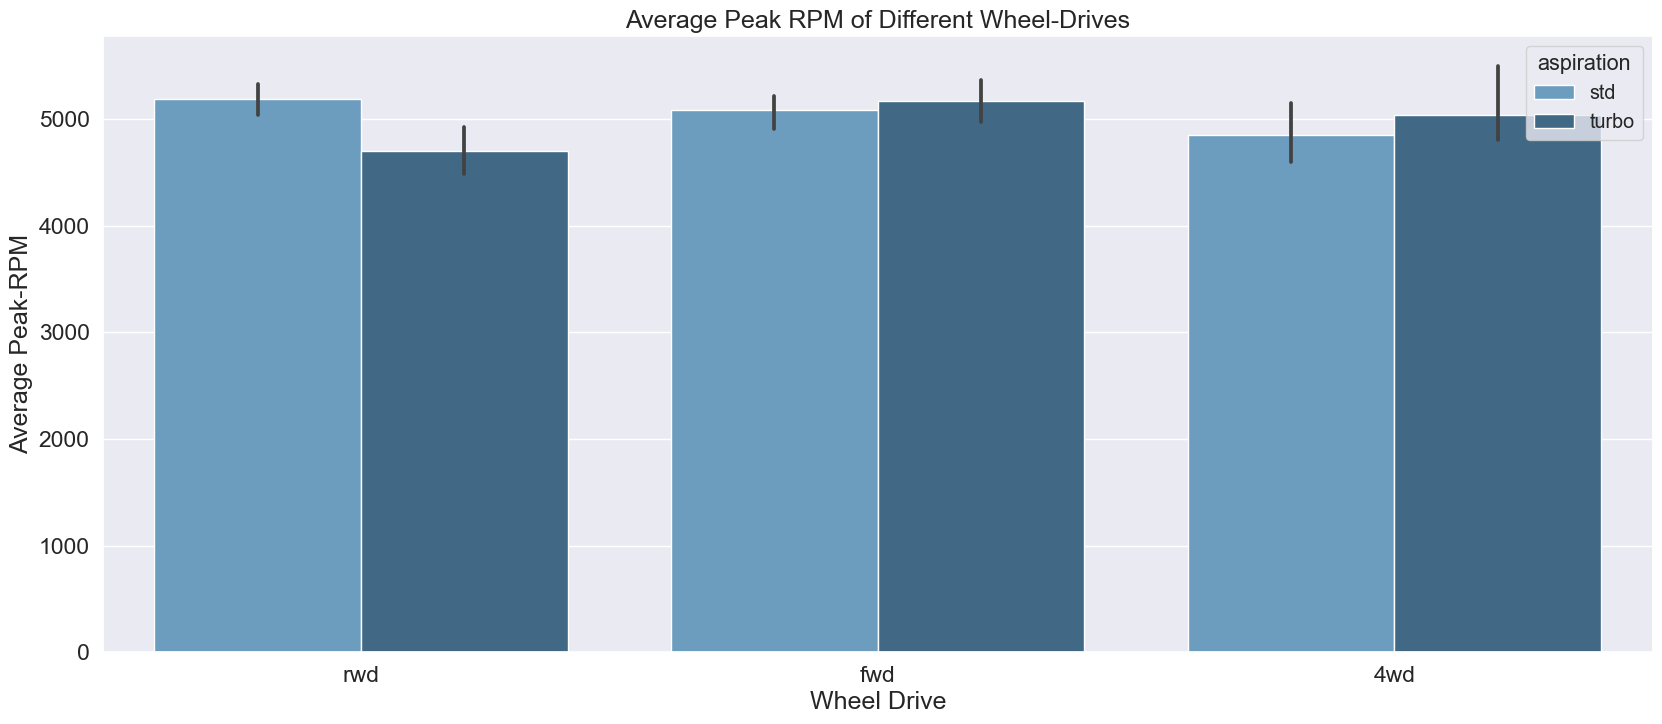

In [131]:
# Average Peak RPM of Different Wheel-Drives
plt.figure(figsize=(20,8))
plt.title('Average Peak RPM of Different Wheel-Drives')
sns.set(font_scale=1.3)
sns.barplot(data=automobile, x='drive-wheels', y='peak-rpm', hue='aspiration', palette='Blues_d')
plt.xlabel('Wheel Drive')
plt.ylabel('Average Peak-RPM')
plt.show()

Factors Correlating with Engine Power

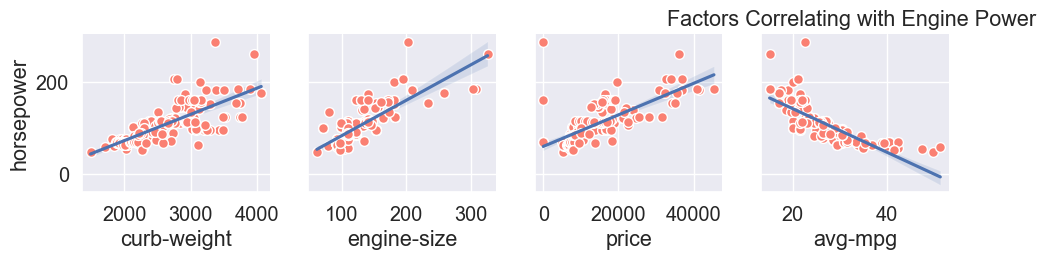

In [132]:
# Factors Correlating with Engine Power
n = sns.PairGrid(automobile, x_vars=["curb-weight", "engine-size", "price","avg-mpg"], y_vars=["horsepower"])
n = n.map(sns.regplot)
n = n.map(plt.scatter, linewidths=1, edgecolor="w", s=50, color='salmon')
plt.title('Factors Correlating with Engine Power ')
sns.set(font_scale=1.3)
plt.show()

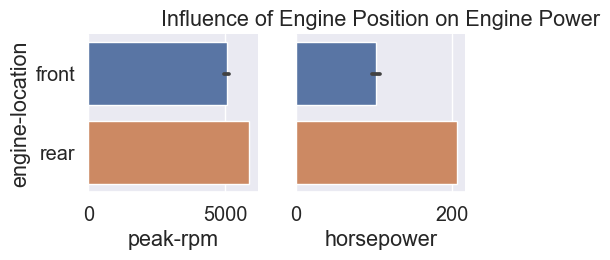

In [133]:
# Influence of Engine Position on Engine Power
o = sns.PairGrid(automobile, x_vars=["peak-rpm","horsepower"], y_vars=["engine-location"])
o = o.map(sns.barplot, palette='husl')

plt.title('Influence of Engine Position on Engine Power')
sns.set(font_scale=1.5)

plt.show()